# EDA On Mobile Prediction Dataset

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize =(12, 7))

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

In [16]:
MobileDataset=pd.read_csv(r"MobileDatasetClassification.csv")

In [17]:
MobileDataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


#### Whenever a customer is buying a mobile phone one of the main things that he/she need is whelther the phone is available in their budget or not. Also other basic features such as dual sim availabilty or internal memory available or weight of the phone or camera quality of the phone or talk time of the phone or the amount of RAM that is available in the phone is studied by the customer. Below is some analysis of the same

### Analysing Nuumber of Phone Of Each Price Range 

In [18]:
#As we can see that each of the categories of phones has 500 phones
MobileDataset["price_range"].value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

<AxesSubplot:xlabel='price_range', ylabel='count'>

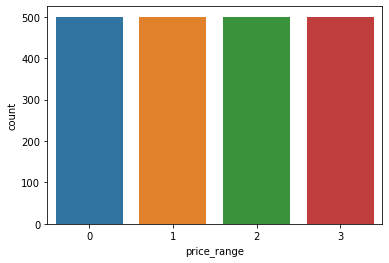

In [19]:
sns.countplot(x=MobileDataset["price_range"])

### Analysing the Number of Phone that are Having Bluetooth and are having dual sim as well

In [20]:
arr=[]
count=0
dual_blue,dual_not_blue,not_dual_blue,not_dual_not_blue=0,0,0,0
for ele in MobileDataset["blue"]:
    if ele==1:
        if MobileDataset["dual_sim"][count]==1:
            dual_blue+=1
        else:
            dual_not_blue+=1
    else:
        if MobileDataset["dual_sim"][count]==1:
            not_dual_blue+=1
        else:
            not_dual_not_blue+=1
    count+=1
print("Phone with Bluetooth and Dual Sim: ",dual_blue)
print("Phone with Bluetooth and Not Dual Sim: ",dual_not_blue)
print("Phone with No Bluetooth and Dual Sim: ",not_dual_blue)
print("Phone with No Bluetooth and Not Dual Sim: ",not_dual_not_blue)

array_keys=["dual_blue","dual_not_blue","not_dual_blue","not_dual_not_blue"]
array_values=np.array([dual_blue,dual_not_blue,not_dual_blue,not_dual_not_blue])



Phone with Bluetooth and Dual Sim:  522
Phone with Bluetooth and Not Dual Sim:  468
Phone with No Bluetooth and Dual Sim:  497
Phone with No Bluetooth and Not Dual Sim:  513


Text(0, 0.5, 'Count of The Phones')

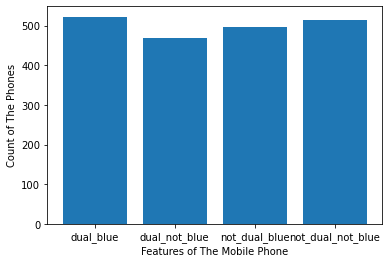

In [21]:
plt.bar(array_keys,array_values)
plt.xlabel("Features of The Mobile Phone")
plt.ylabel("Count of The Phones")

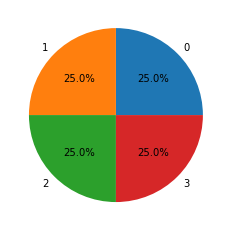

In [25]:
t_list4=list(MobileDataset["price_range"])
values_x4=[ele for ele in list(set(t_list4))]
values_y4=[t_list4.count(ele) for ele in values_x4]
plt.pie(values_y4, labels = values_x4,autopct='%.1f%%')
plt.show()

#All The Range Values Of The Price Of The Mobile Phones 
#Is Distributed Equally Amoung Each Other

<BarContainer object of 4 artists>

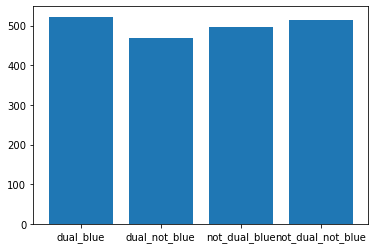

In [23]:
plt.bar(array_keys,array_values)

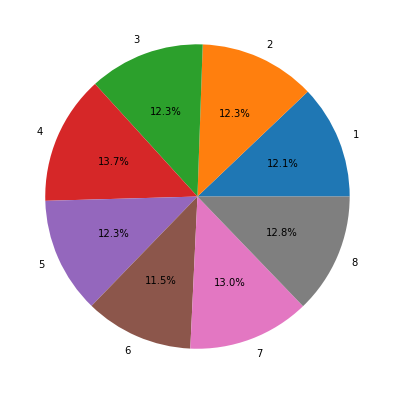

In [24]:
t_list2=list(MobileDataset["n_cores"])
values_x2=[ele for ele in list(set(t_list2))]
values_y2=[t_list2.count(ele) for ele in values_x2]
plt.figure(figsize =(12, 7))
plt.pie(values_y2, labels = values_x2,autopct='%.1f%%')
plt.show()

# Also This Number Of Cores Attribute Is Very Much Equally Divided 
# Amoung The Dataset
# Thus There Is No Noticible Bias That Can Be Presently Seen

(array([215., 183., 206., 200., 189., 219., 202., 181., 197., 208.]),
 array([ 256. ,  630.2, 1004.4, 1378.6, 1752.8, 2127. , 2501.2, 2875.4,
        3249.6, 3623.8, 3998. ]),
 <BarContainer object of 10 artists>)

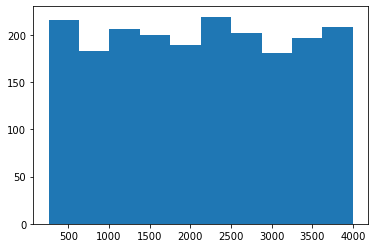

In [28]:
# It can be observed that more number of phones are in 2250 to 2500 megabytes range
# Although they have not much of the majority as they are distributed nearly equally over the range
plt.hist(MobileDataset["ram"])

(array([223., 199., 210., 199., 190., 185., 193., 201., 197., 203.]),
 array([ 501. ,  650.7,  800.4,  950.1, 1099.8, 1249.5, 1399.2, 1548.9,
        1698.6, 1848.3, 1998. ]),
 <BarContainer object of 10 artists>)

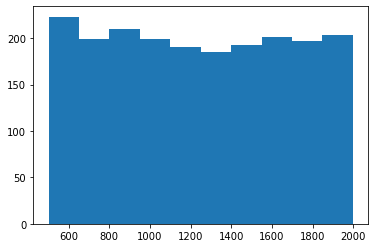

In [30]:
# Here also the battery powers are distributed normally over the range
plt.hist(MobileDataset["battery_power"])

### Let us analyse how many phones are there with most of the required specifications

### One of the main requirements maybe touchscreen,wifi and four_g availabilty

The Phone with all specifications and number of phones in each price range are
Number of phones in price range 0 : 64
Number of phones in price range 1 : 69
Number of phones in price range 2 : 54
Number of phones in price range 3 : 80


<BarContainer object of 4 artists>

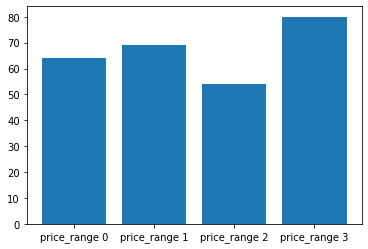

In [37]:
count=0
price0,price1,price2,price3=0,0,0,0
for ele in MobileDataset["price_range"]:
    if ele==0:
        if MobileDataset["four_g"][count]==1 and MobileDataset["touch_screen"][count]==1 and MobileDataset["wifi"][count]==1:
            price0+=1
    elif ele==1:
        if MobileDataset["four_g"][count]==1 and MobileDataset["touch_screen"][count]==1 and MobileDataset["wifi"][count]==1:
            price1+=1
    elif ele==2:
        if MobileDataset["four_g"][count]==1 and MobileDataset["touch_screen"][count]==1 and MobileDataset["wifi"][count]==1:
            price2+=1
    else:
        if MobileDataset["four_g"][count]==1 and MobileDataset["touch_screen"][count]==1 and MobileDataset["wifi"][count]==1:
            price3+=1
    count+=1
    
print("The Phone with all specifications and number of phones in each price range are")
print("Number of phones in price range 0 :",price0)
print("Number of phones in price range 1 :",price1)
print("Number of phones in price range 2 :",price2)
print("Number of phones in price range 3 :",price3)

arr1=["price_range 0","price_range 1","price_range 2","price_range 3"]
arr2=np.array([price0,price1,price2,price3])

plt.bar(arr1,arr2)